# Chapter 1.
In this chapter we will look at how the sciunit optimizer is readily used to fit abstract neuronal model behavior to experimentally recorded neuron waveform shapes. You can think of this problem as a type of inverse search, where we have experimental data that can be used to constrain a waveform shape. There are lots of different possible parameterizations of models we will explore, and we want to select the particular model parameterization that best agrees with experimentally recorded measurements. 

Golowasch, J., Goldman, M., Abbott, L.F, and Marder, E. (2002)
Failure of averaging in the construction
of conductance-based neuron models. J. Neurophysiol., 87: 11291131.

### Next Chapters
In **chapter 2** (a closely related notebook see hyperlink) 
I demonstrate optimization using spike time statistics via the allen SDK
[Chapter 2](chapter2.ipynb)

In **chapter 3** (a closely related notebook see hyperlink) 
We will take a closer at the data used to perform the fits in this notebook.
[Chapter 3](chapter3.ipynb)

In **chapter 5** (a closely related notebook see hyperlink) 
We will look at projections of Optimized cells onto a Druckman feature space, we will also look at extracting Allen SDK features from the optimized cells.
[Chapter 3](chapter5.ipynb)

The table below includes the five different varieties of experimental cell data that we will demonstrate how to optimize against. We will find solutions to 10 different problems.



| Cell Type   |      Model Type1       |     Model Type2     | simulator backend |
|----------|----------|----------|:-------------:|
| Cerebellum Purkinje cell   | Adaptive Exponential | Izhikitich Model   |brian2,Forward Euler|
| Olfactory bulb (main) mitral cell |    Adaptive Exponential | Izhikitich Model   |brian2,Forward Euler|
| Hippocampus CA1 pyramidal cell	 | Adaptive Exponential | Izhikitich Model |brian2,Forward Euler|
| Neocortex pyramidal cell layer 5-6 | Adaptive Exponential | Izhikitich Model|brian2,Forward Euler|
| Hippocampus CA1 basket cell | Adaptive Exponential | Izhikitich Model|brian2,Forward Euler|



### Get optimization results.
In the cells below we either preload pre-optimized data for five different experimental cell types, ir in the absence of data, do the optimization in place below.

Set up environment.
In the cell below we set up an environment that supports visualization of 
pre-computed optimization results. This also includes download of the results. This also includes forcing a notebook compliant plotting backend initialization.

In [1]:
%%capture
import warnings
warnings.filterwarnings("ignore")

import matplotlib as mpl
import matplotlib.pyplot as plt



import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pickle
import os

from neuronunit.optimisation.optimization_management import TSD, get_dtc_pop
from neuronunit.optimisation import model_parameters


try:
    import nbimporter
except:
    !pip install nbimporter
    import nbimporter
from importlib import reload
import chapter5 as chapter5
import pandas as pd

try:
    import efel
    import tabulate

except:
    !pip install efel
    !pip install tabulate

from neuronunit.optimisation.get_three_feature_sets_from_nml_db import three_feature_sets_on_static_models
try:
    results = pickle.load(open('../unit_test/working/all_data_tests.p','rb'))
except:
    try:
        os.system('wget https://www.dropbox.com/s/cod7jz4yrr55dsw/all_data_tests.p?dl=0')
        results = pickle.load(open('../unit_test/working/all_data_tests.p?dl=0','rb'))
    except:
        import elephant_data_tests

        # No data available, so lets generate data in place below:
        # Do the optization in place.
        results = pickle.load(open('../unit_test/working/all_data_tests.p','rb'))

(Pdb) c


### Load in pre-wrangled/refined data
that was output from a previous optimization process.

In [2]:
import os
result_RAW = pickle.load(open('RAWall_data_tests.p','rb'))
result_ADEXP = pickle.load(open('ADEXPall_data_tests.p','rb'))
result_RAW = result_RAW['RAW']

electro_path = str(os.getcwd())+'/../tests/russell_tests.p'

assert os.path.isfile(electro_path) == True
with open(electro_path,'rb') as f:
    (test_frame,obs_frame) = pickle.load(f)
filtered_tests = {key:val for key,val in test_frame.items()}

print('Neuronunit tests used to constrain models against these experimental cell types {0}'.format(filtered_tests.keys()))


Neuronunit tests used to constrain models against these experimental cell types dict_keys(['Cerebellum Purkinje cell', 'Olfactory bulb (main) mitral cell', 'Hippocampus CA1 pyramidal cell', 'Neocortex pyramidal cell layer 5-6', 'Hippocampus CA1 basket cell'])


In [3]:


ad_olf_dtc = result_ADEXP['ADEXP']['olf'][0].dtc
ad_purkine_dtc = result_ADEXP['ADEXP']['purkine'][0].dtc
ad_ca1pyr_dtc = result_ADEXP['ADEXP']['ca1pyr'][0].dtc
ad_ca1basket_dtc = result_ADEXP['ADEXP']['ca1basket'][0].dtc
ad_neo_dtc = result_ADEXP['ADEXP']['neo'][0].dtc

In [4]:
olf_dtc = result_RAW['olf'][0]
purkine_dtc = result_RAW['purkine'][0]
ca1pyr_dtc = result_RAW['ca1pyr'][0]
ca1basket_dtc = result_RAW['ca1basket'][0]
neo_dtc = result_RAW['neo'][0]




In [8]:
#dir(neo_dtc)
neo_dtc.scores_ratio
import pandas as pd

try:
    import nbimporter
except:
    !pip install nbimporter
    import nbimporter
from importlib import reload
import chapter5 as chapter5

#reload(chapter5)
to_df = []
ADEXP_dtc,RAW_dtc = chapter5.result_to_dict(result_ADEXP,result_RAW)
for k in ADEXP_dtc.keys():
    scores_ratio = {}
    scores_ratio['forward_euler_izhikitich'] = RAW_dtc[k][0].scores_ratio
    scores_ratio['brian2_adaptive_exponential'] = ADEXP_dtc[k][0].scores_ratio
    to_df.append(scores_ratio)
dfsr = pd.DataFrame(to_df)    
for i,k in enumerate(ADEXP_dtc.keys()):
    dfsr = dfsr.rename(index={i:k})


In the data frame below you can see that the Hippocampus CA1 basket cell was the most able to impose it's constraints onto abstract models. Inhibitory neurons are often fast spiking. The mitral olfactory bulb data was also highly amenable to optimization in the case of the apative exponential model, however we should not be too surprised as the corresponding ***Neuronunit*** test suite consisted of fewer constraints.

In [9]:
dfsr    

,brian2_adaptive_exponential,forward_euler_izhikitich
Cerebellum Purkinje cell,0.665494,0.424728
Olfactory bulb (main) mitral cell,0.740788,0.230287
Hippocampus CA1 pyramidal cell,0.468669,0.159026
Neocortex pyramidal cell layer 5-6,0.341935,0.154778
Hippocampus CA1 basket cell,0.558945,0.155093


We picture the CA1 Basket Cell spike waveform shape below:

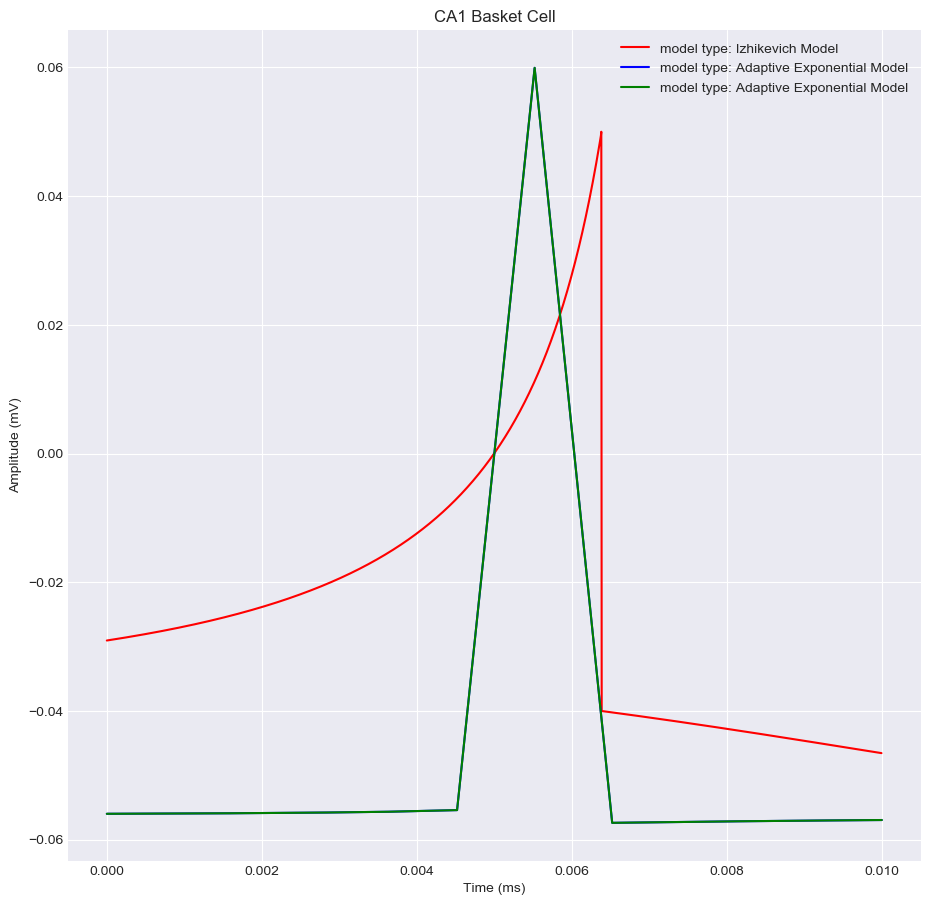

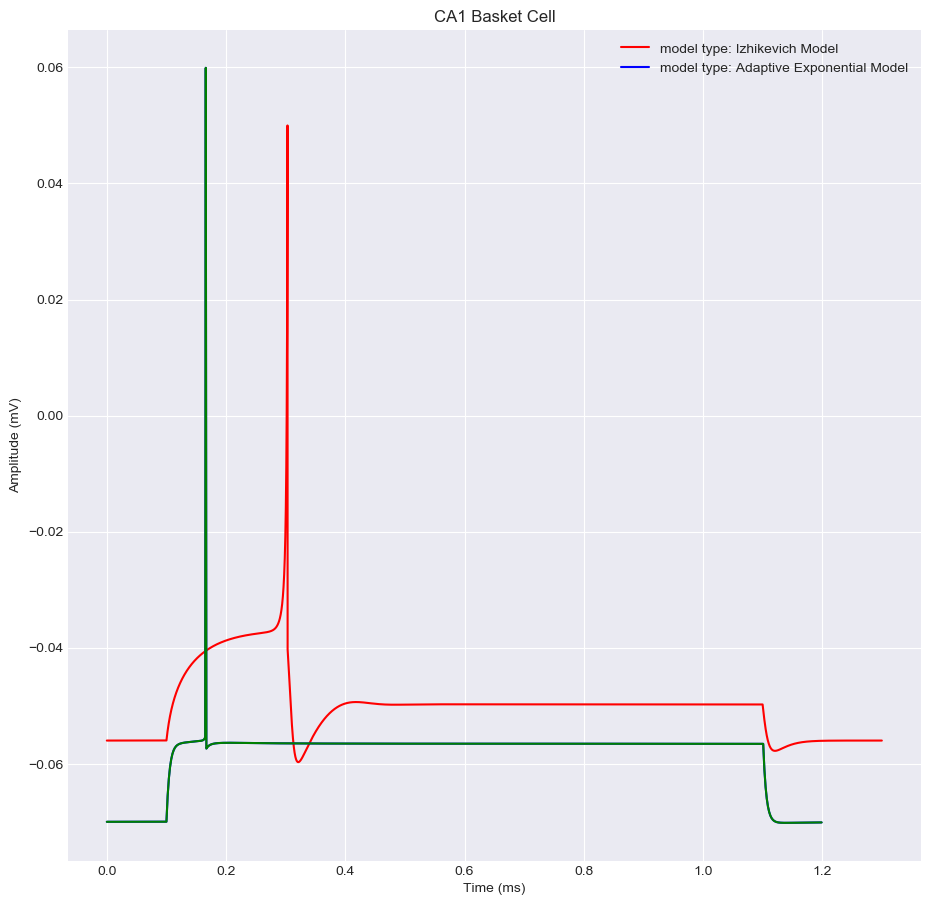

In [11]:
from neuronunit.optimisation.optimization_management import inject_and_plot

_ = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc],snippets=True,experimental_cell_type='CA1 Basket Cell')
_ = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc],snippets=False,experimental_cell_type='CA1 Basket Cell')


In [12]:
from neuronunit.optimisation.optimization_management import transform, save_models_for_justas, write_opt_to_nml
try:
    write_opt_to_nml(olf_dtc)
    save_models_for_justas(olf_dtc)
except:
    pass

## Explanation of Iterated Plots Below:
For every model pertaining to a different experimental cell show the rheobase spike waveform shape for the best  solution from the two different classes of optimized models. This is an indirect way of cross checking that optimizer worked, as it exerted the same constraints on different neural models, therefore one would expect to see similar waveforms in the same plot, just with different colors.

Initially you can see that spike onset time was not a feature used to constrain models, therefore the two different model classes vary a lot in spike onset time, however, we were less interested in spike timing, and more interested in waveform shape properties. Therefore in second form of plots (scroll down), one can see that spike onset time has been artificially controlled for in the spike visualization be re-aligning waveforms.

The adpative exponential model has an artificial triangular appearance, only because as model developers we realized we could further optimize the cells experimental agreement, by adding in code hacks to improve the cells spike amplitude.

Without this code modification, waveform shapes look deceptively dissimilar to a human viewer.

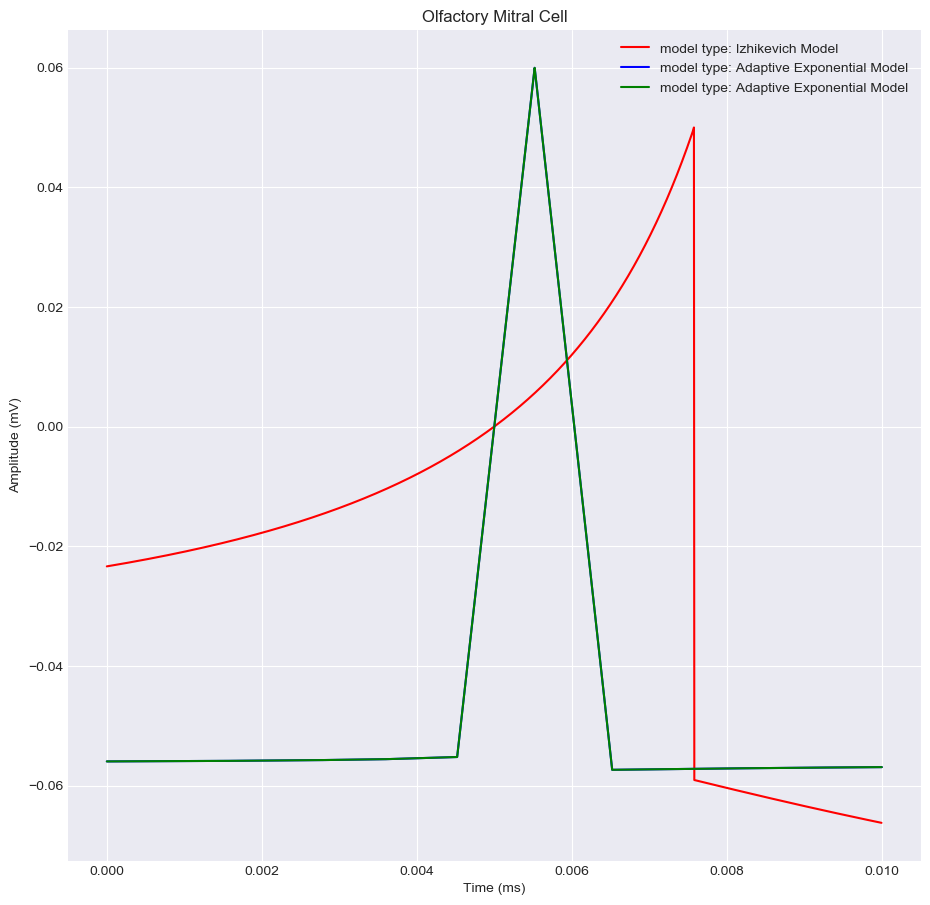

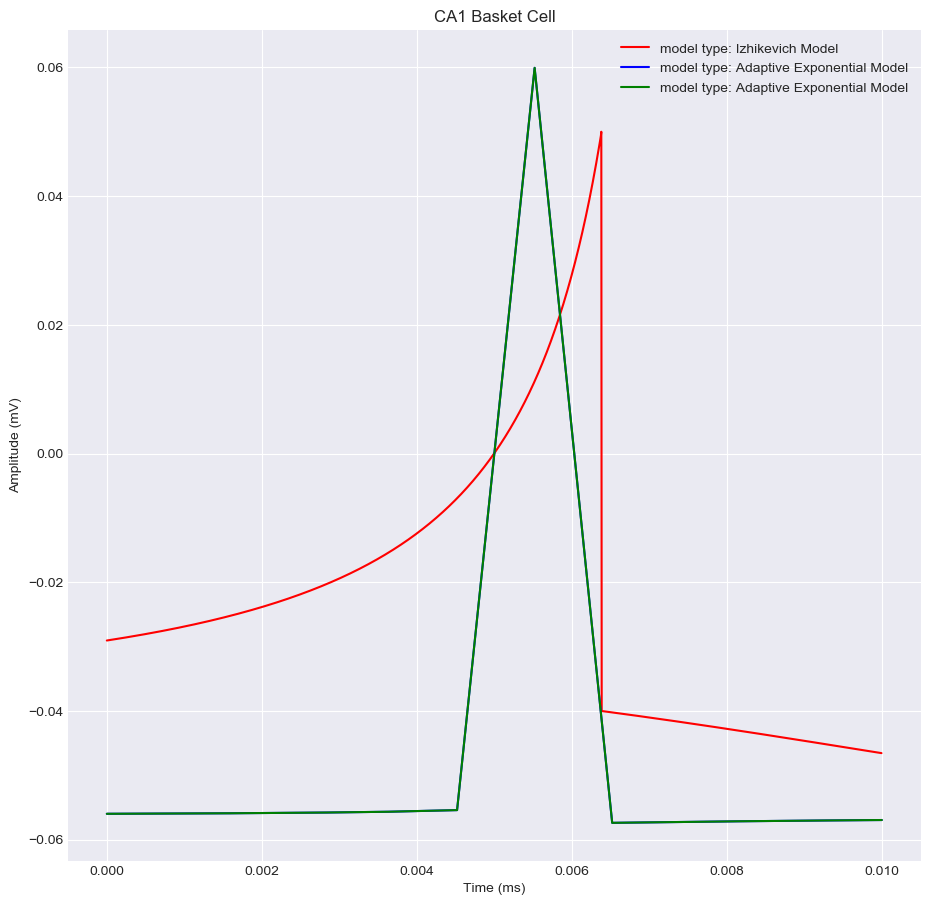

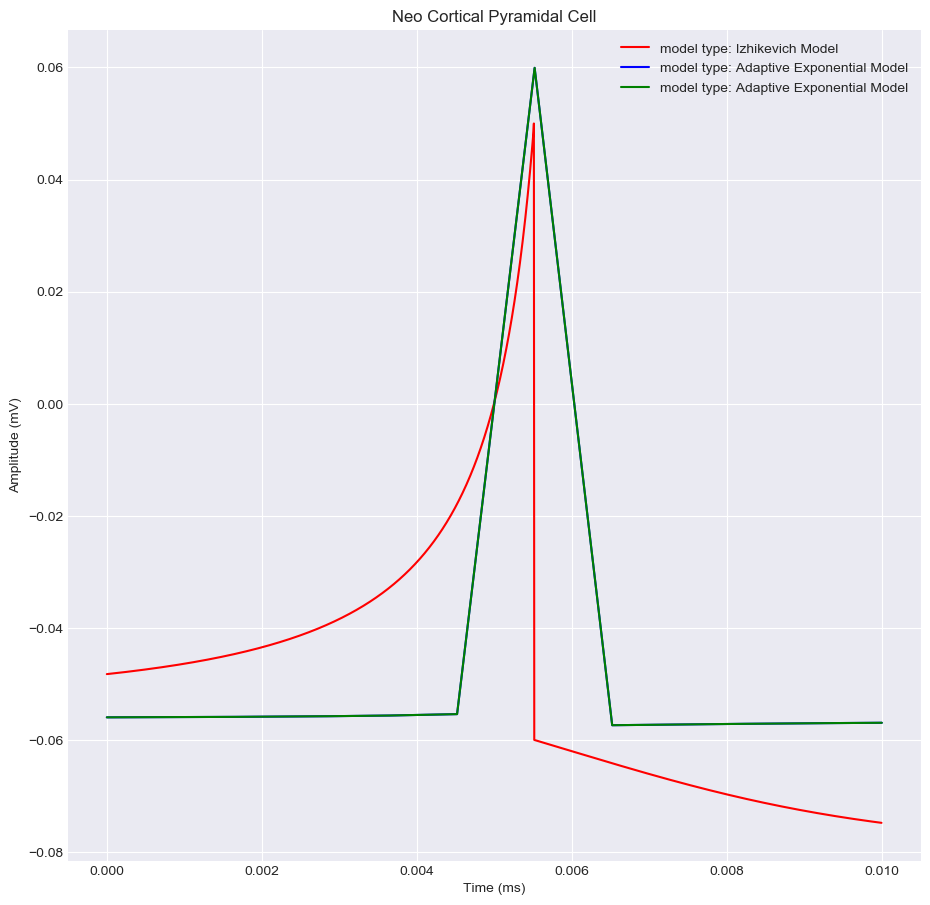

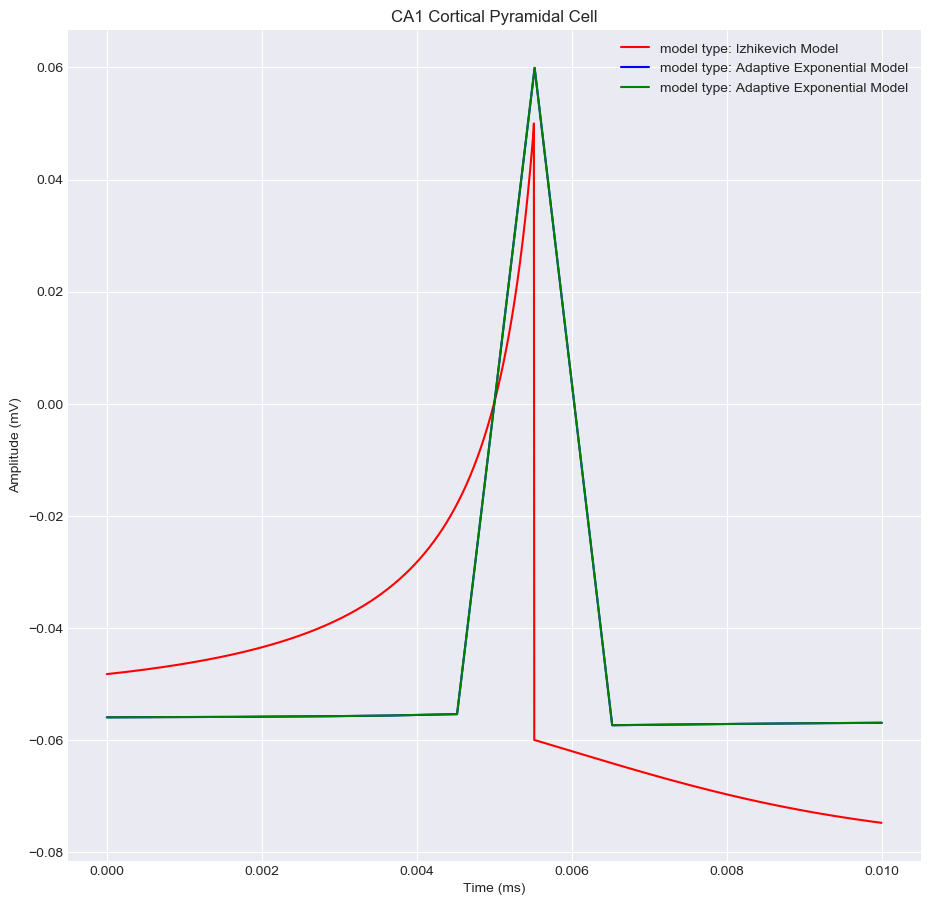

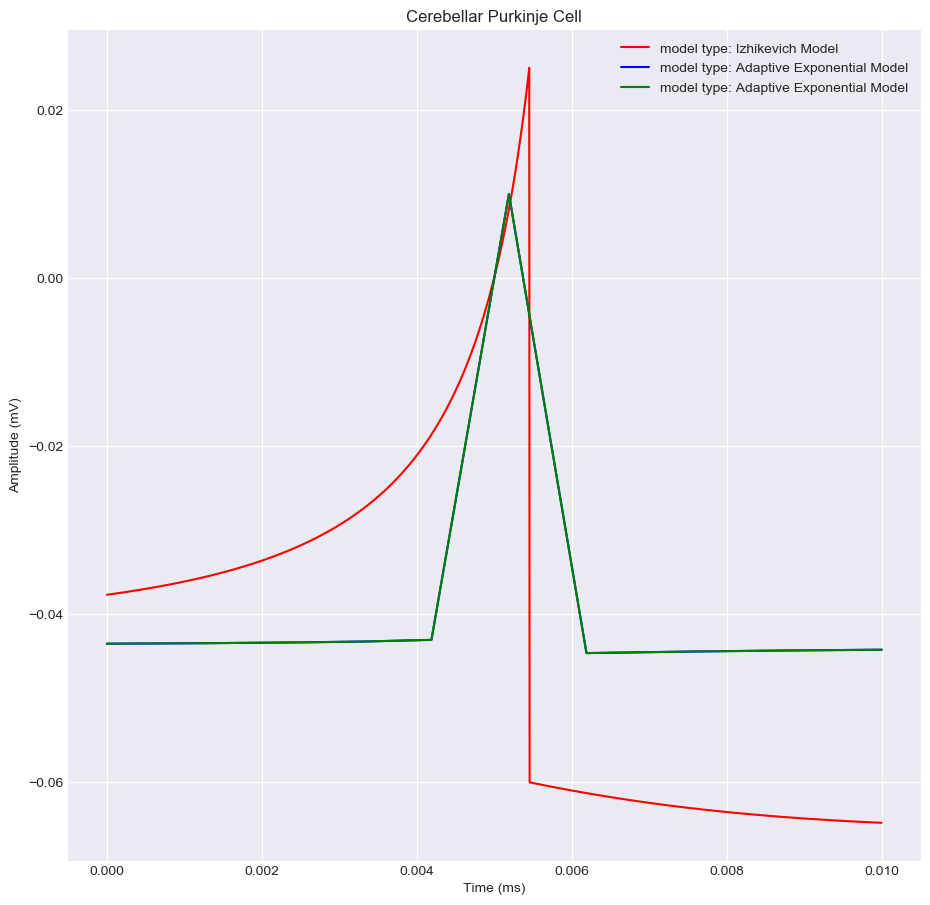

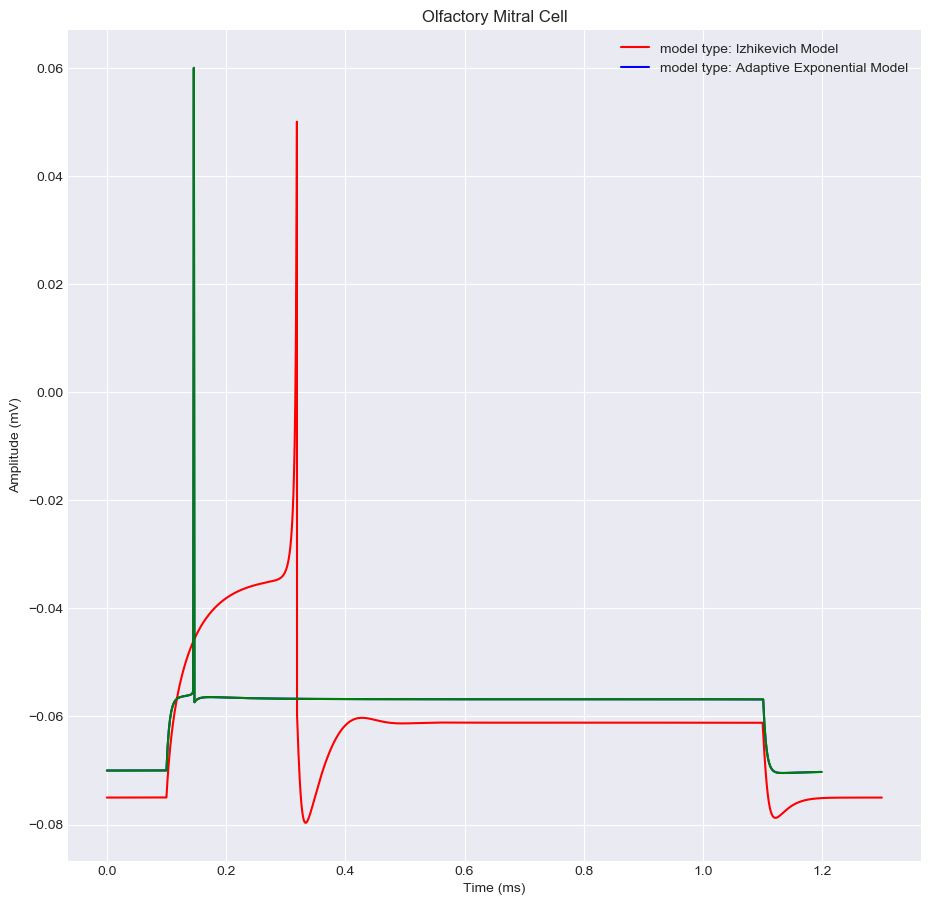

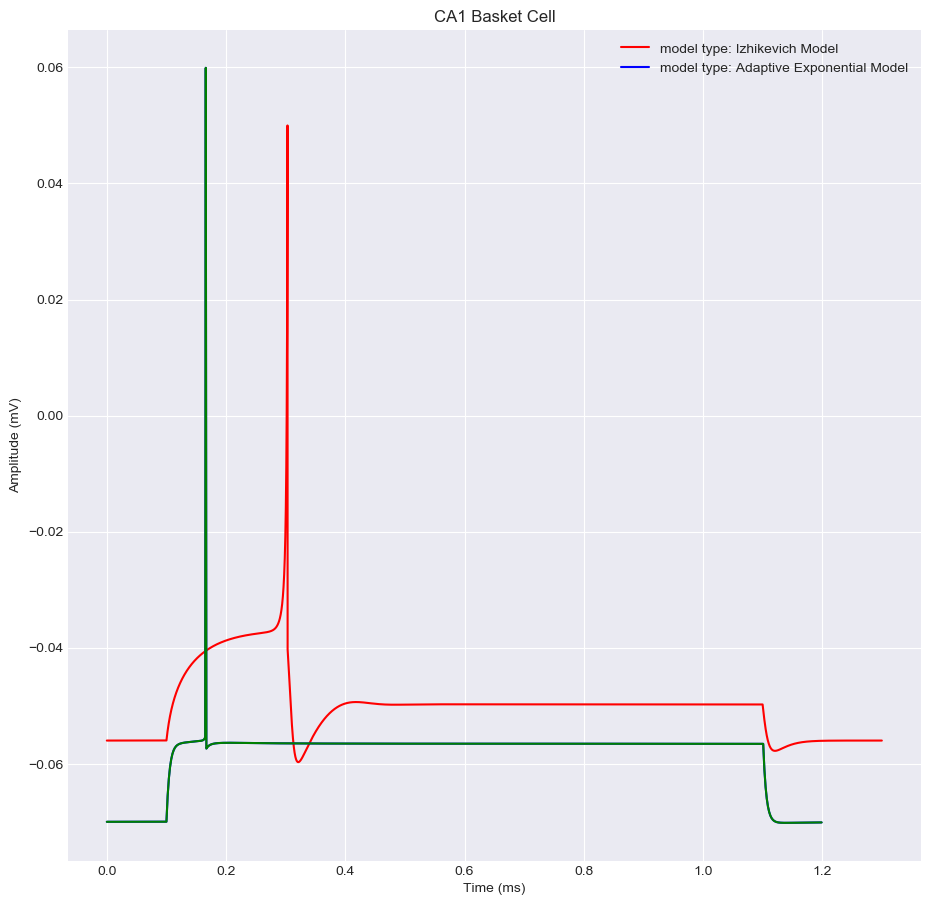

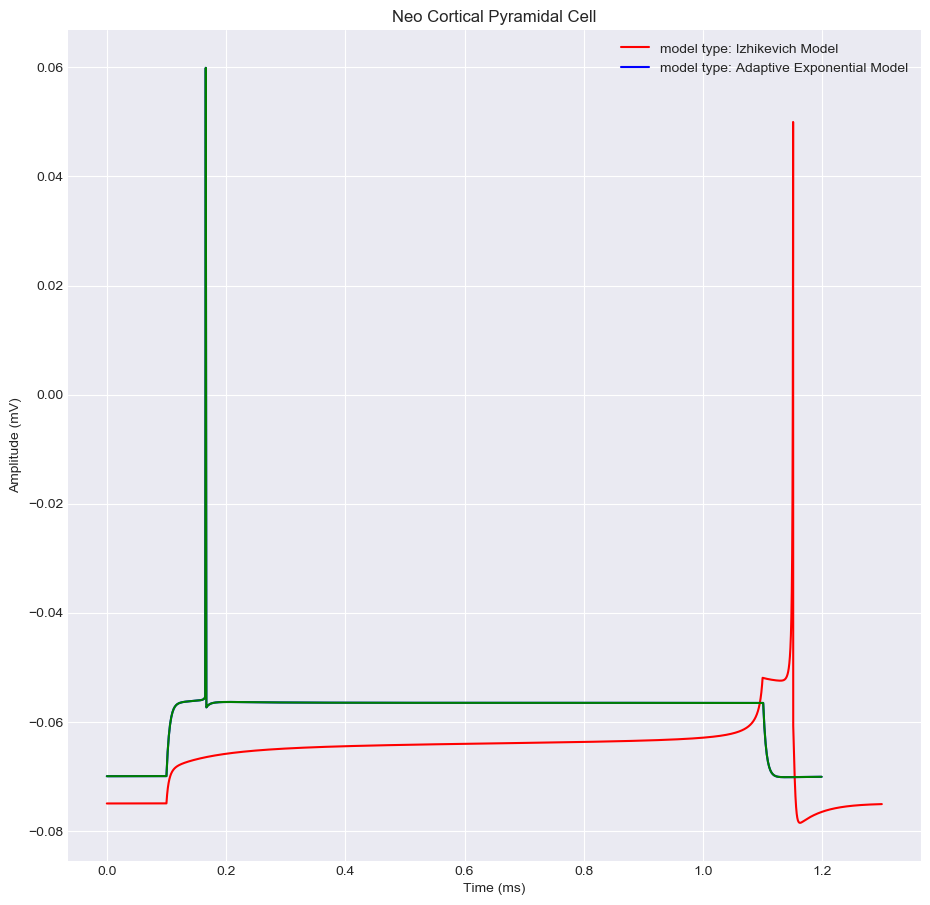

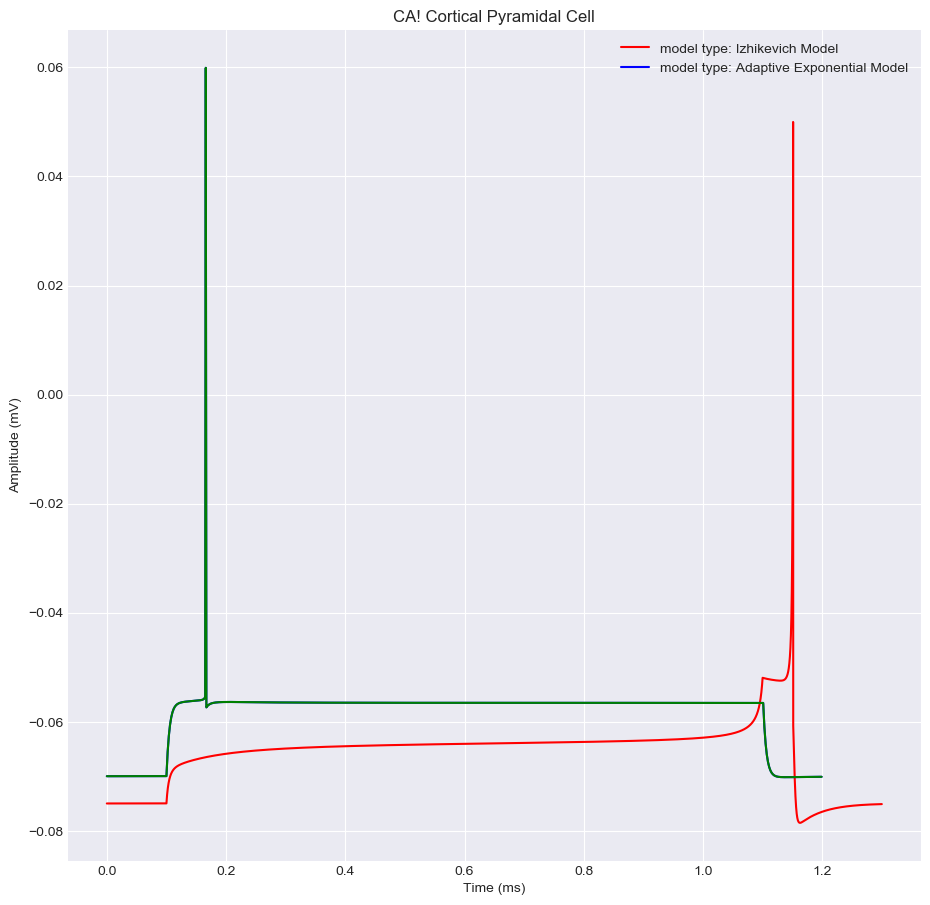

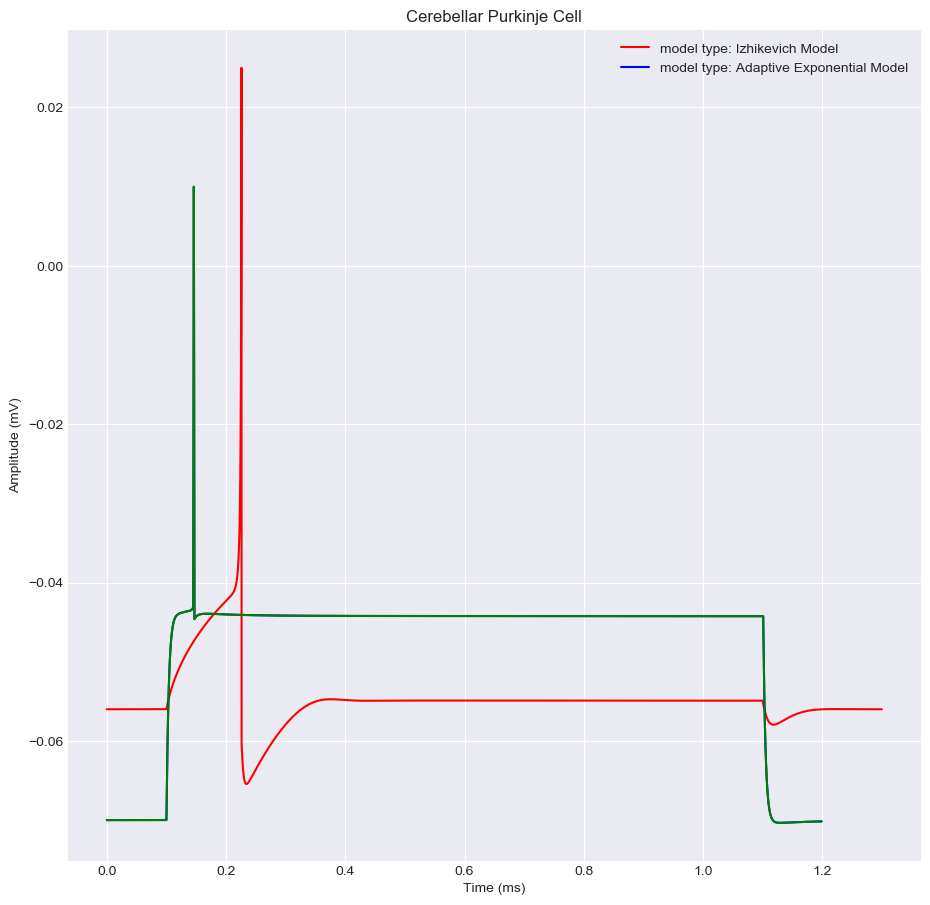

In [13]:

_ = inject_and_plot([olf_dtc],second_pop=[ad_olf_dtc],third_pop=[ad_olf_dtc],snippets=True,experimental_cell_type='Olfactory Mitral Cell')
_ = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc],snippets=True,experimental_cell_type='CA1 Basket Cell')
_ = inject_and_plot([neo_dtc],second_pop=[ad_neo_dtc],third_pop=[ad_neo_dtc],snippets=True,experimental_cell_type='Neo Cortical Pyramidal Cell')
_ = inject_and_plot([ca1pyr_dtc],second_pop=[ad_ca1pyr_dtc],third_pop=[ad_ca1pyr_dtc],snippets=True,experimental_cell_type='CA1 Cortical Pyramidal Cell')
_ = inject_and_plot([purkine_dtc],second_pop=[ad_purkine_dtc],third_pop=[ad_purkine_dtc],snippets=True,experimental_cell_type='Cerebellar Purkinje Cell')

_ = inject_and_plot([olf_dtc],second_pop=[ad_olf_dtc],third_pop=[ad_olf_dtc],experimental_cell_type='Olfactory Mitral Cell')
_ = inject_and_plot([ca1basket_dtc],second_pop=[ad_ca1basket_dtc],third_pop=[ad_ca1basket_dtc],experimental_cell_type='CA1 Basket Cell')
_ = inject_and_plot([neo_dtc],second_pop=[ad_neo_dtc],third_pop=[ad_neo_dtc],experimental_cell_type='Neo Cortical Pyramidal Cell')
_ = inject_and_plot([ca1pyr_dtc],second_pop=[ad_ca1pyr_dtc],third_pop=[ad_ca1pyr_dtc],experimental_cell_type='CA! Cortical Pyramidal Cell')
_ = inject_and_plot([purkine_dtc],second_pop=[ad_purkine_dtc],third_pop=[ad_purkine_dtc],experimental_cell_type='Cerebellar Purkinje Cell')



In [14]:
#RAW.keys()
#ADEXP.keys()
import pandas as pd
df = pd.DataFrame([ad_purkine_dtc.attrs])
df.T

,0
ADAPTATION_TIME_CONSTANT_tau_w,87.50000
ADAPTATION_VOLTAGE_COUPLING_a,0.56250
C,0.87500
FIRING_THRESHOLD_v_spike,-30.00000
MEMBRANE_RESISTANCE_R,0.03125
MEMBRANE_TIME_SCALE_tau_m,4.37500
RHEOBASE_THRESHOLD_v_rh,-43.75000
SHARPNESS_delta_T,0.25000
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,6.12500
V_RESET,-44.62500



| Cell Type   |       Adaptive Exponential      |     Izhikitich Model    |
|----------|----------|:-------------:|
| Cerebellum Purkinje cell   | score out of 8 lower is better |   score out of 8 lower is better |
| Olfactory bulb (main) mitral cell | score out of 8 lower is better | score out of 8 lower is better   |
| Hippocampus CA1 pyramidal cell	 | score out of 8 lower is better | score out of 8 lower is better |
| Neocortex pyramidal cell layer 5-6 | score out of 8 lower is better | score out of 8 lower is better |
| Hippocampus CA1 basket cell | score out of 8 lower is better | score out of 8 lower is better |


## Demonstrate Diversity of Optimization solution sets:
### Plot all optimized cells from the pareto front fo just one class of cell.

The purpose of this is to show that the pareto front from the converged genetic algorithm, retains much important variation in spike waveform shape.

Diversity of firing shape is retained in the NSGA3 algorithm, by deliberatley favoring collections of solutions, consisting of vary different parameter sets (solution hyper volume is maximized as one of many optimization criterion).

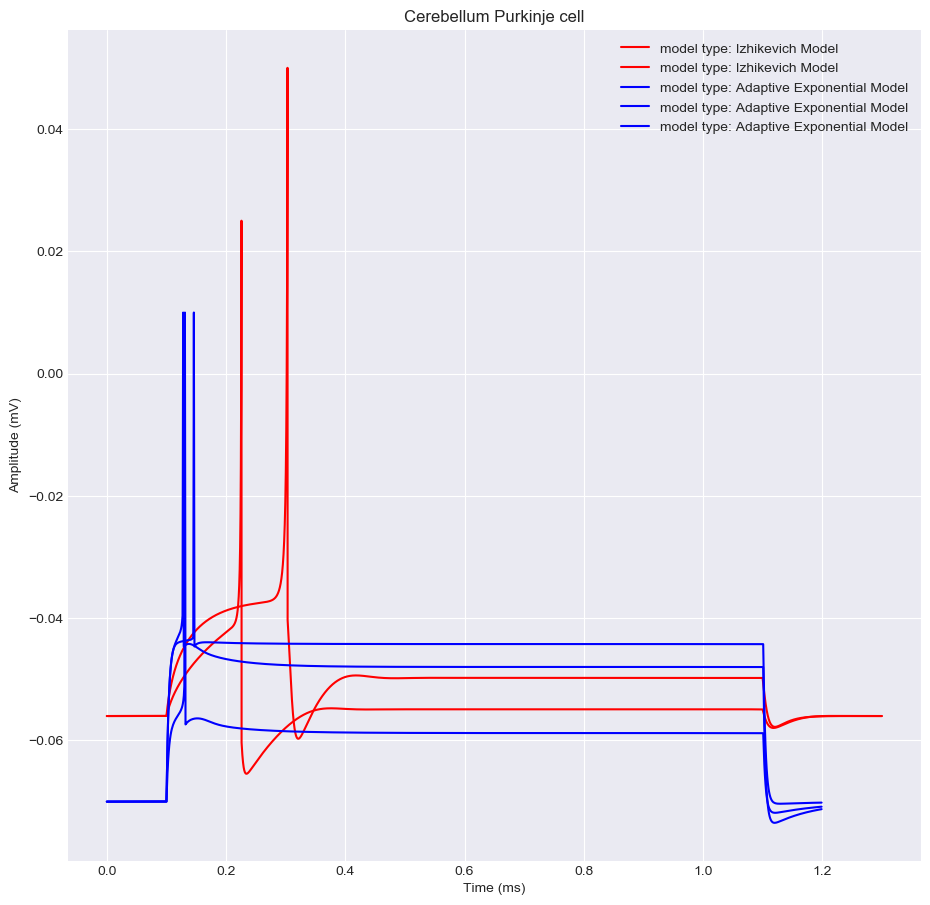

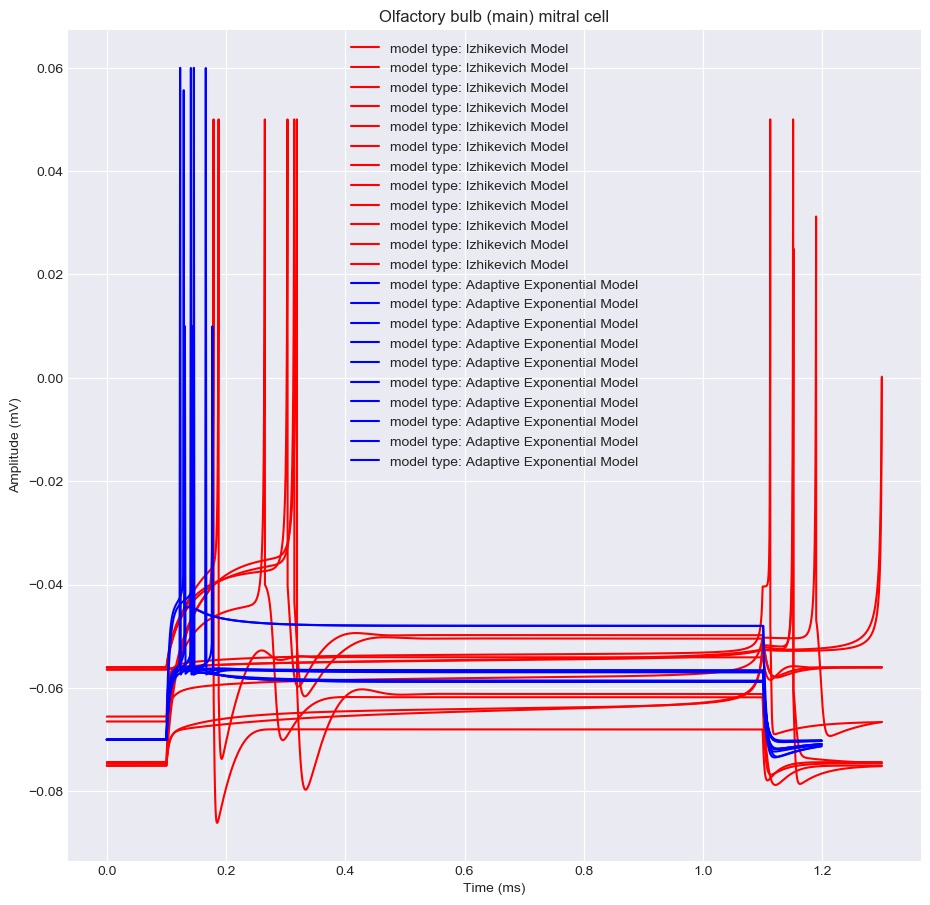

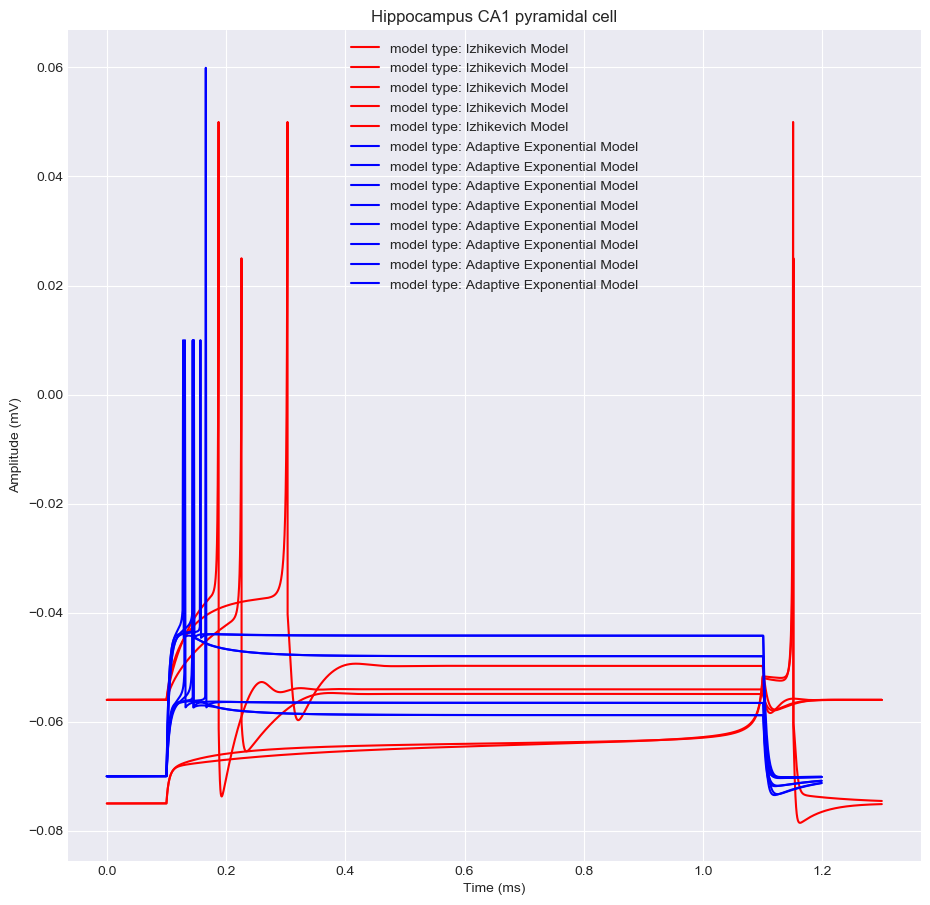

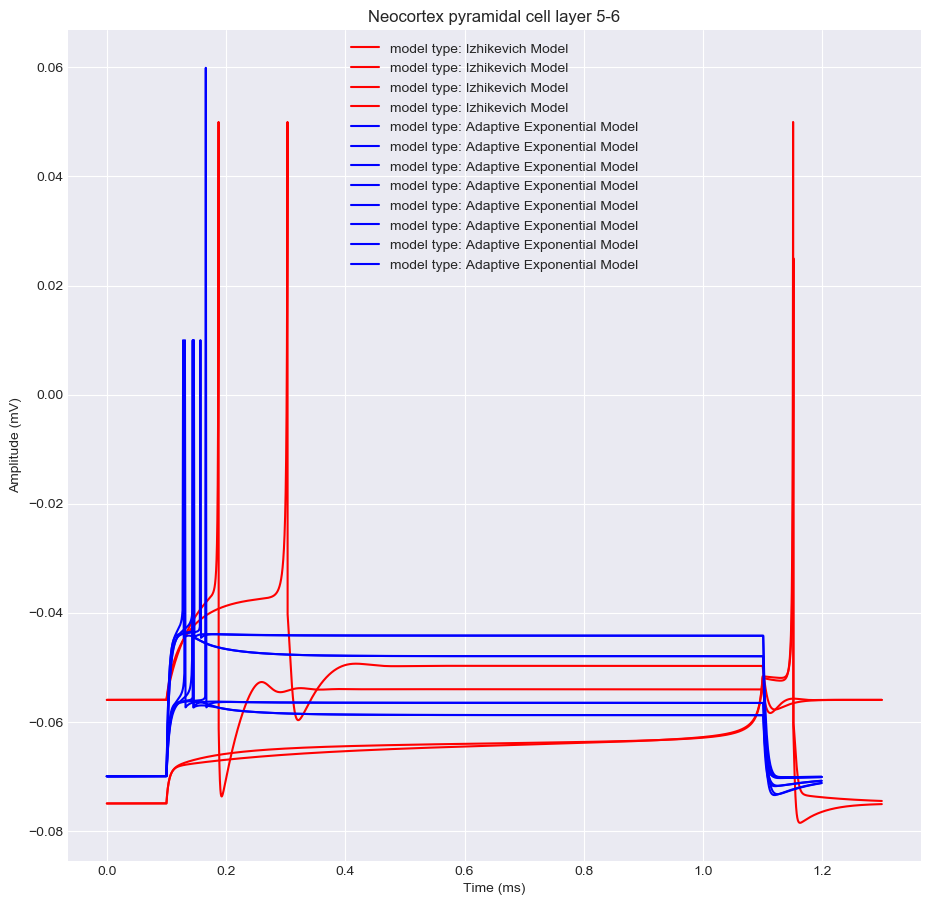

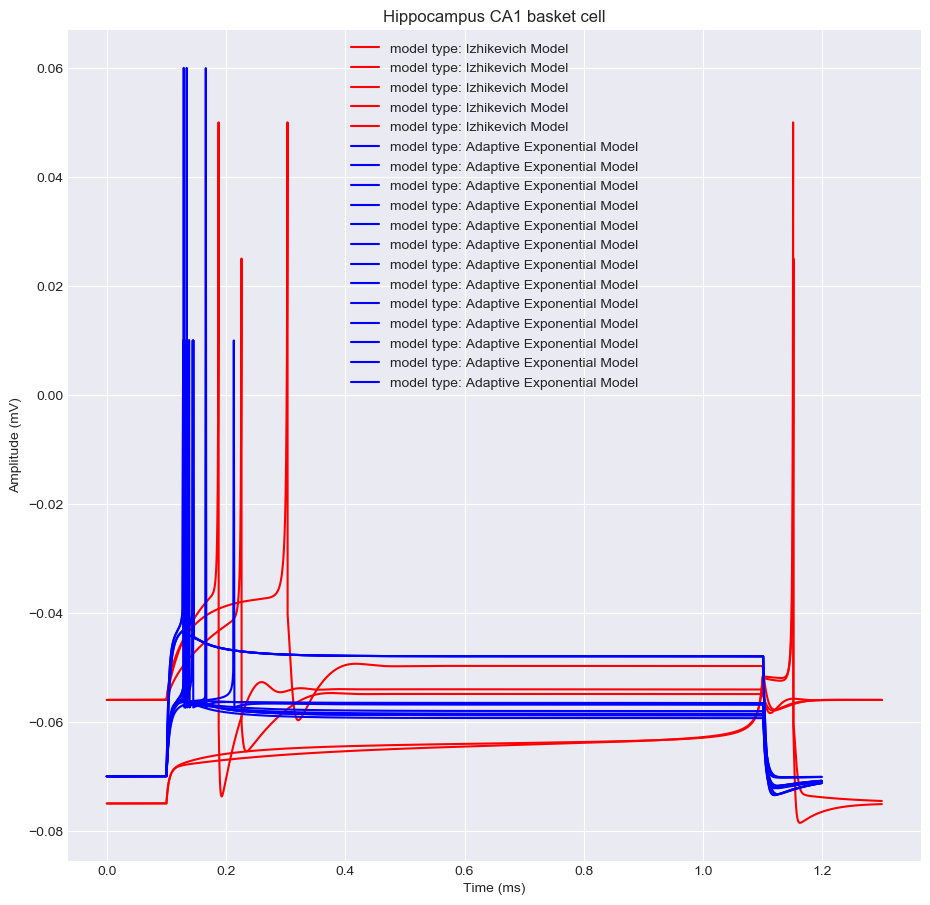

In [15]:


for k,v in ADEXP_dtc.items():
    vm = inject_and_plot(RAW_dtc[k],second_pop=ADEXP_dtc[k],experimental_cell_type=k)

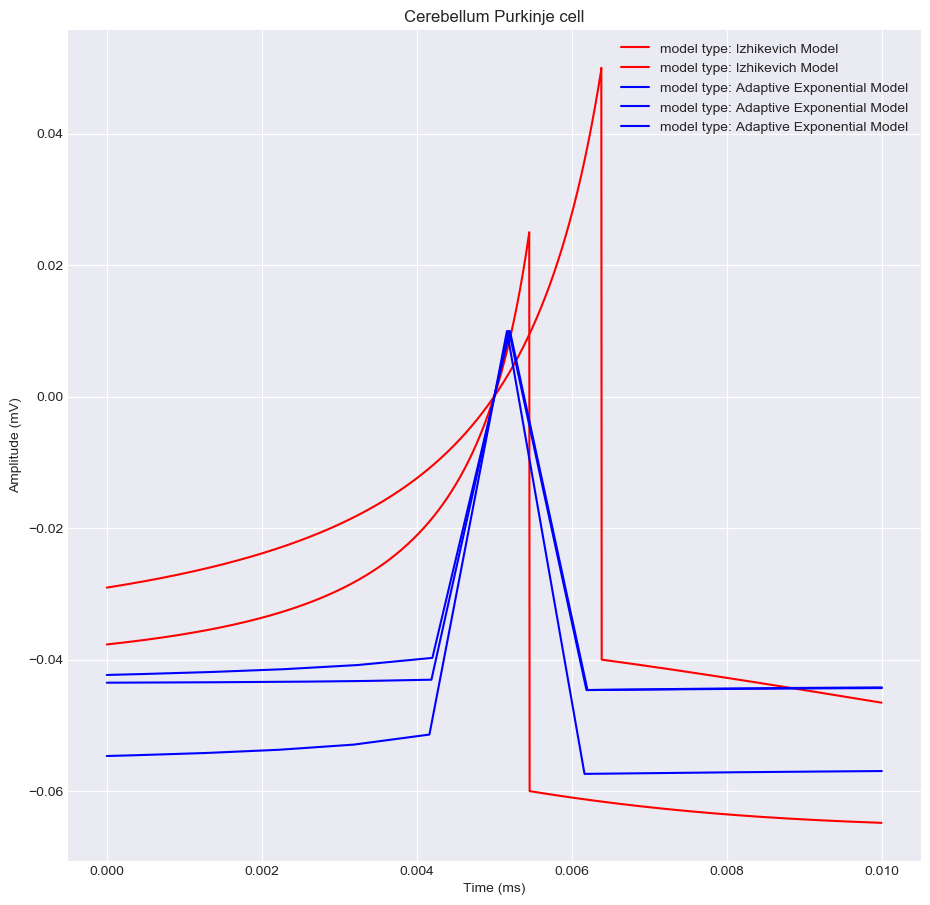

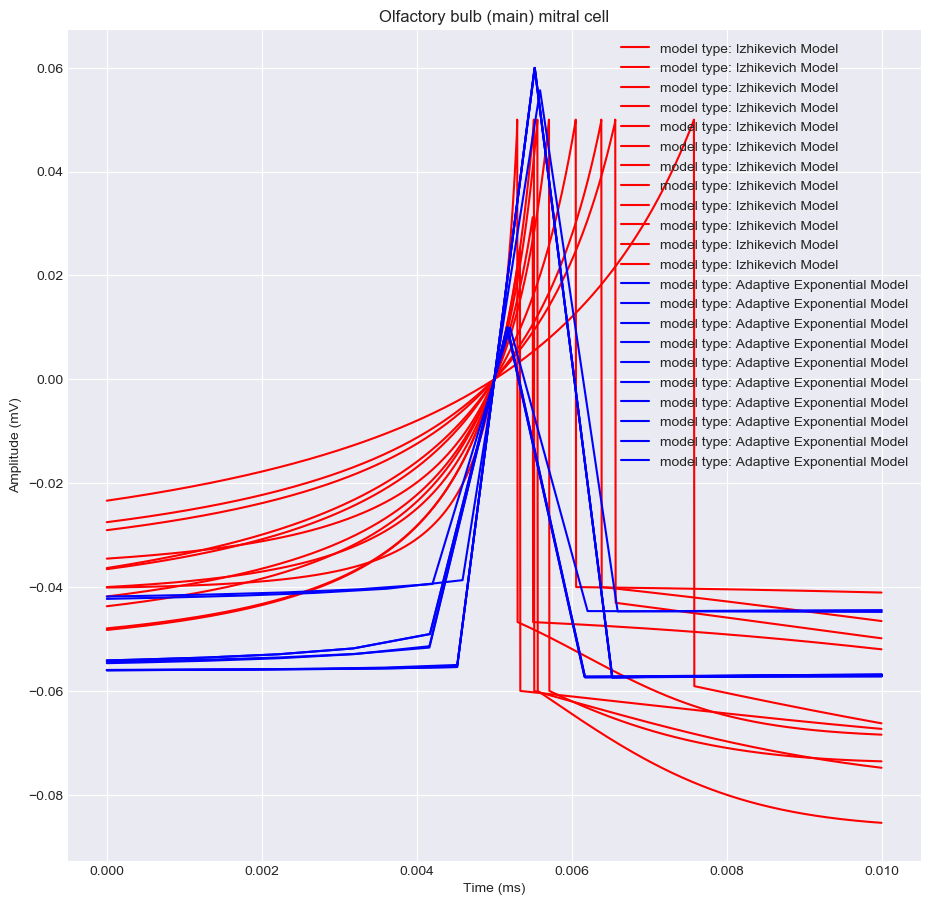

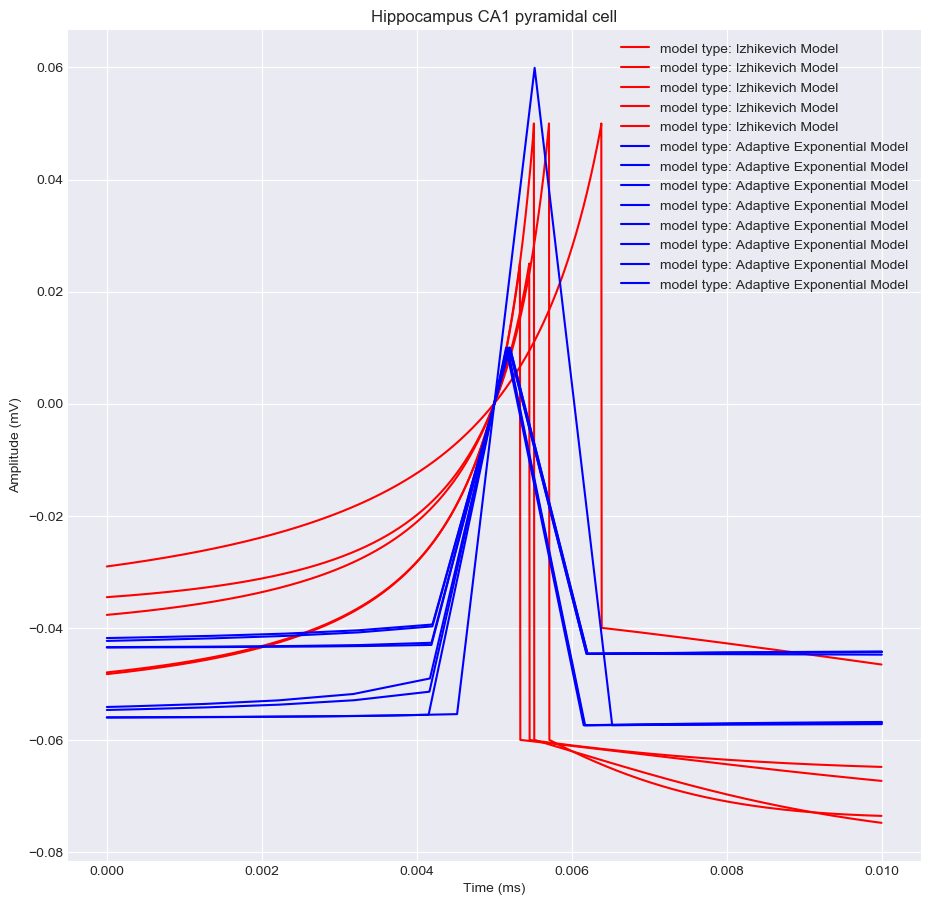

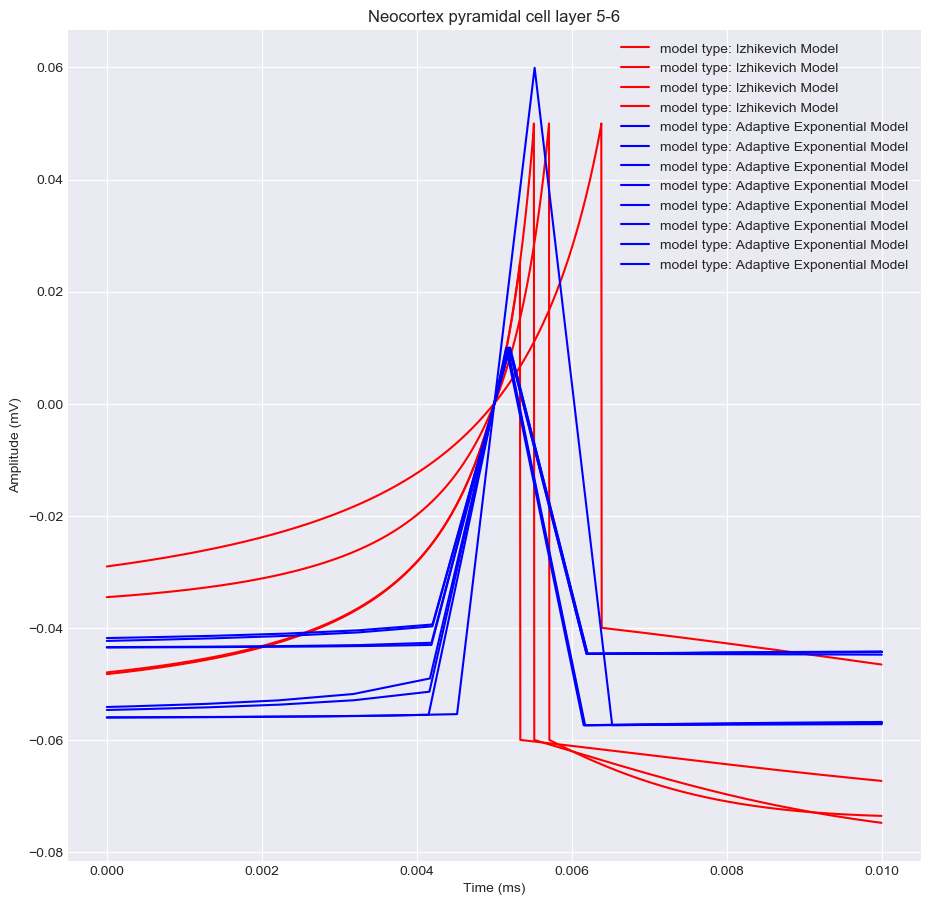

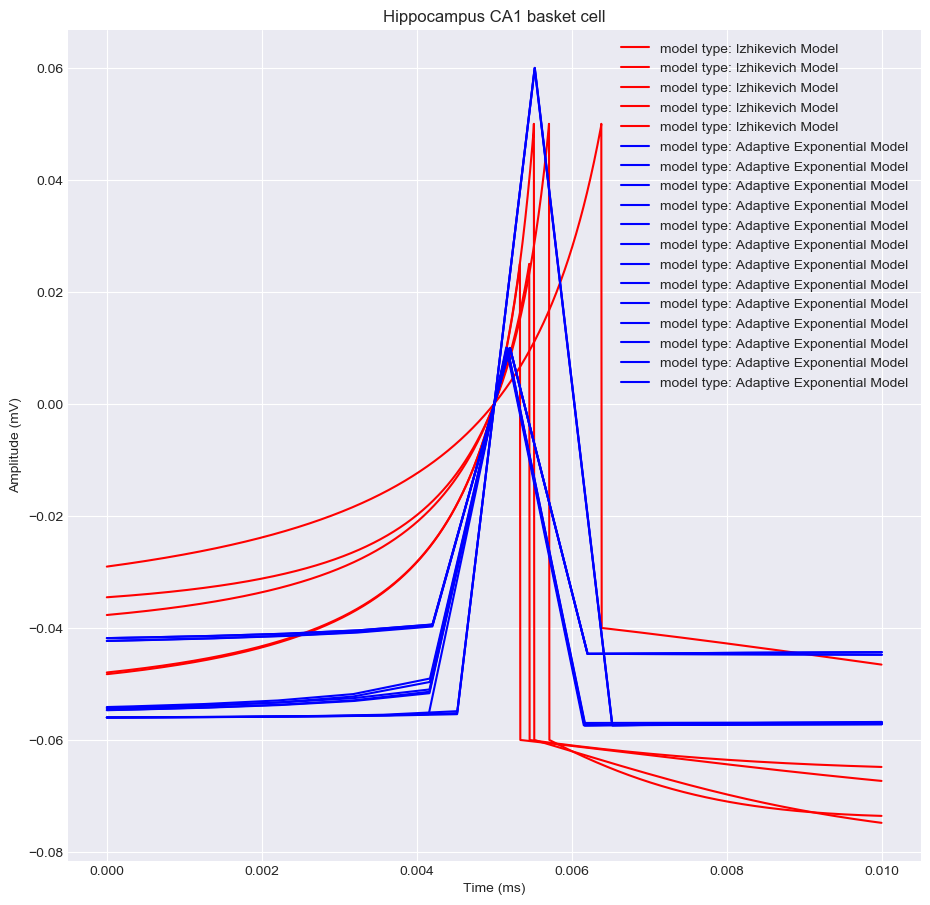

In [16]:
for k,v in ADEXP_dtc.items():

    vm = inject_and_plot(RAW_dtc[k],second_pop=ADEXP_dtc[k],snippets=True,experimental_cell_type=k)

#  Do a cursory check of Neuron Unit test scores.
by looking into observation/prediction agreement for the two different models classes, in the case of optimizing against one particular experimental cell. In priciple this can easily be done for all of the different experimental cells.

Note many of the tables below, are unintentional clones of each other. This is an intermittent problem to do with indexing data properly that I am currently fixing. By examining the graphs above its easy to confirm that optimization outputs appropriately vary to match specific cells.

We will more thoroughly interrogate test scores in chapter3, as this work is continued in detail in [chapter3](chapter3.ipynb)

In [17]:

print(result_ADEXP.keys())
import pandas as pd

from IPython.display import display
import copy
RAW_dtc = {}
ADEXP_dtc = {}
#type(result_ADEXP['ADEXP']['olf'][0])
RAW_dtc = {}
RAW_dtc['Cerebellum Purkinje cell'] = result_RAW['purkine']
RAW_dtc['Olfactory bulb (main) mitral cell'] = result_RAW['olf']
RAW_dtc['Hippocampus CA1 pyramidal cell'] = result_RAW['ca1pyr']
RAW_dtc['Neocortex pyramidal cell layer 5-6'] = result_RAW['neo']
RAW_dtc['Hippocampus CA1 basket cell'] = result_RAW['ca1basket']

ADEXP_dtc = {}
ADEXP_dtc['Cerebellum Purkinje cell'] = [d.dtc for d in result_ADEXP['ADEXP']['purkine']]
ADEXP_dtc['Olfactory bulb (main) mitral cell'] = [d.dtc for d in result_ADEXP['ADEXP']['olf']]
ADEXP_dtc['Hippocampus CA1 pyramidal cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1pyr']]
ADEXP_dtc['Neocortex pyramidal cell layer 5-6'] = [d.dtc for d in result_ADEXP['ADEXP']['neo']]
ADEXP_dtc['Hippocampus CA1 basket cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1basket']]

for k in RAW_dtc.keys():
    print(k)
    df1 = None
    df0 = None
    df1 = pd.DataFrame([RAW_dtc[k][0].scores])
    df1= df1.rename(index={0: str('Izhikivitch')})
    df0 = pd.DataFrame([ADEXP_dtc[k][0].scores])
    df0 = df0.rename(index={0: str('ADEXP')})
    df2 = df0.append(df1)
    df3 = df2.T
    display(df3)


dict_keys(['ADEXP'])
Cerebellum Purkinje cell


,ADEXP,Izhikivitch
CapacitanceTest,1.000000,0.012996
InputResistanceTest,0.001482,1.000000
RestingPotentialTest,0.995000,0.004202
RheobaseTest,NaN,0.681712


Olfactory bulb (main) mitral cell


,ADEXP,Izhikivitch
CapacitanceTest,1.000000,0.053126
InjectedCurrentAPAmplitudeTest,0.475449,0.011043
InjectedCurrentAPThresholdTest,1.000000,0.053136
InjectedCurrentAPWidthTest,1.000000,0.002660
InputResistanceTest,0.278329,1.000000
RestingPotentialTest,0.778443,0.009377
RheobaseTest,NaN,0.662833
TimeConstantTest,0.906379,0.050123


Hippocampus CA1 pyramidal cell


,ADEXP,Izhikivitch
CapacitanceTest,1.000000,0.053048
InjectedCurrentAPAmplitudeTest,0.652951,0.018608
InjectedCurrentAPThresholdTest,1.000000,0.053135
InjectedCurrentAPWidthTest,0.999970,0.031424
InputResistanceTest,0.047166,1.000000
RestingPotentialTest,0.245781,0.002693
RheobaseTest,0.767632,0.061107
TimeConstantTest,0.581731,0.052195


Neocortex pyramidal cell layer 5-6


,ADEXP,Izhikivitch
CapacitanceTest,1.000000,0.053138
InjectedCurrentAPAmplitudeTest,0.645363,0.018299
InjectedCurrentAPThresholdTest,1.000000,0.053135
InjectedCurrentAPWidthTest,0.030217,0.006863
InputResistanceTest,0.284520,1.000000
RestingPotentialTest,0.008705,0.003564
RheobaseTest,0.987473,0.053093
TimeConstantTest,0.074515,0.050133


Hippocampus CA1 basket cell


,ADEXP,Izhikivitch
CapacitanceTest,1.000000,0.053009
InjectedCurrentAPAmplitudeTest,0.226356,0.006493
InjectedCurrentAPThresholdTest,1.000000,0.053142
InjectedCurrentAPWidthTest,1.000000,0.019945
InputResistanceTest,0.351827,1.000000
RestingPotentialTest,0.622459,0.006830
RheobaseTest,1.000000,0.052950
TimeConstantTest,0.261493,0.048371


In [18]:

md = tabulate.tabulate(df3, headers='keys', tablefmt='pipe')
# Fix the markdown string; it will not render with an empty first table cell,
# so if the dataframe's index has no name, just place an 'x' there.
md = md.replace('|    |','| %s |' % (df.index.name if df.index.name else 'x'))

from IPython.display import display, Markdown, Latex
display(Markdown(md))

|                                |    ADEXP |   Izhikivitch |
|:-------------------------------|---------:|--------------:|
| CapacitanceTest                | 1        |    0.0530094  |
| InjectedCurrentAPAmplitudeTest | 0.226356 |    0.00649298 |
| InjectedCurrentAPThresholdTest | 1        |    0.0531423  |
| InjectedCurrentAPWidthTest     | 1        |    0.019945   |
| InputResistanceTest            | 0.351827 |    1          |
| RestingPotentialTest           | 0.622459 |    0.00683006 |
| RheobaseTest                   | 1        |    0.0529502  |
| TimeConstantTest               | 0.261493 |    0.0483708  |

In the cell above it looks like the adaptive expontial model struggles to recaptiluate an experimental value of a rheobase test current injection, but does well on most other tests. It even outperforms the izhikitch model on Injected Amplitude accuracy, Input resistance accuracy, Resting potenial accuracy, and the time constant test.

The izhikevitch model has a different strength weekness profile to the Adaptive Exponential model. The izhikitch model is unable to recapitulate  experimental data for the input resistance test, but it does well better than the adaptive expontial model at matching the experimental capacitance, and matching the experimental width to name a few scores. The adaptive exponential model is able to do well at matching experimental rheobase values.

# In chapter 3
We will go beyond Neuronunits optimization test scores and instead check for agreement between the experimental literature and model outputs.


In **chapter 3** (a closely related notebook see [**chapter 3**](chapter3.ipynb) 


The user of the Sciunit optimization can use the outuput of previous optimizations to initiate future optimization work. Optimization often involves an exploration/exploitation trade-off. The user of this optimization tool, can opt-into greater exploration of the solution space. See below:


```python
%%capture
from neuronunit.optimisation.optimisations import run_ga
from neuronunit.optimisation import model_parameters
MODEL_PARAMS=model_parameters.MODEL_PARAMS['ADEXP']
test = TSD(filtered_tests['Hippocampus CA1 pyramidal cell'])
test.use_rheobase_score = True
out = run_ga(MODEL_PARAMS, 1, test, \
        free_params = MODEL_PARAMS.keys(), hc = None, MU = len(result_ADEXP['ADEXP']['ca1pyr']), seed_pop = result_ADEXP['ADEXP']['ca1pyr'], \
           backend = str('ADEXP'),protocol={'use_rheobase_score':True,'allen':False,'elephant':True})

filtered_tests.keys()
out
```           

# End of chapter 1
*** see chapters 2,3,4,5 ***

Disregard the following content which is a draft copy of chapter 5

In [19]:
compare0 = {t.name:t.observation for t in RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].tests.values() }
compare0 = {k:(v,RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].predictions[k]) for k,v in compare0.items()  }

In [20]:
print([t for t in ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].tests ])

['RestingPotentialTest', 'InjectedCurrentAPThresholdTest', 'TimeConstantTest', 'InjectedCurrentAPAmplitudeTest', 'CapacitanceTest', 'InjectedCurrentAPWidthTest', 'RheobaseTest', 'InputResistanceTest']


In [21]:
compare1 = {t.name:t.observation for t in ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].tests.values() }
print(compare1.keys())
print(ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].predictions.keys())
compare1 = {k:(v,ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].predictions[k]) for k,v in compare1.items() if k in ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].predictions.keys()}

dict_keys(['RestingPotentialTest', 'InjectedCurrentAPThresholdTest', 'TimeConstantTest', 'InjectedCurrentAPAmplitudeTest', 'CapacitanceTest', 'InjectedCurrentAPWidthTest', 'RheobaseTest', 'InputResistanceTest'])
dict_keys(['RestingPotentialTest', 'TimeConstantTest', 'CapacitanceTest', 'InputResistanceTest'])


In [22]:

def format_nice_frame(compare0):
    pre_df = {}
    for k,v in compare0.items():
        temp = v[0][list(v[0].keys())[0]].rescale(v[1][list(v[1].keys())[0]].units)
        pre_df[k] = (temp,v[1][list(v[1].keys())[0]],v[0]['std'].rescale(v[1][list(v[1].keys())[0]].units))
        df6=pd.DataFrame([pre_df])    

    return df6  
df6 = format_nice_frame(compare0)

# compare observations and predictions:

In [23]:
df6.T

,0
CapacitanceTest,"(1.1935200000000002e-10 s**4*A**2/(kg*m**2), 3..."
InjectedCurrentAPAmplitudeTest,"(0.076344 V, 0.050078552336368334 V, 1.14516 V)"
InjectedCurrentAPThresholdTest,"(-48.870000000000005 mV, -0.016423944294033058..."
InjectedCurrentAPWidthTest,"(0.00031 s, 0.00027 s, 0.0046500000000000005 s)"
InputResistanceTest,"(160000.0 kg*m**2/(s**3*A**2), 10896311095.306..."
RestingPotentialTest,"(-0.07029 V, -0.075 V, -1.0543500000000001 V)"
RheobaseTest,"(76.77099999999999 pA, 0.08599686506158832 pA,..."
TimeConstantTest,"(0.006500000000000001 s, 0.0003698576047475654..."


# Look at where the optimized cells reside in regular parameter space
The NSGA3 algorithm returns a pareto front as a solution, this front as acts as a set of diverse model parameterizations


In [24]:
RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].attrs.pop('Iext',None)
attrsf0=pd.DataFrame([RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].attrs])
attrsf0

,C,a,b,c,d,dt,k,vPeak,vr,vt
0,50,0.03,-2,-60,150,0.005,0.7,50,-75,-50


In [25]:
RAW_dtc['Neocortex pyramidal cell layer 5-6'][-1].attrs.pop('Iext',None)
attrsf1=pd.DataFrame([RAW_dtc['Neocortex pyramidal cell layer 5-6'][-1].attrs])
attrsf1

,C,a,b,c,d,dt,k,vPeak,vr,vt
0,50,0.03,15,-60,150,0.005,0.7,50,-56,-50


In [26]:
ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].attrs.pop('Iext',None)
attrsf3=pd.DataFrame([ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].attrs])
attrsf3

,ADAPTATION_TIME_CONSTANT_tau_w,ADAPTATION_VOLTAGE_COUPLING_a,C,FIRING_THRESHOLD_v_spike,MEMBRANE_RESISTANCE_R,MEMBRANE_TIME_SCALE_tau_m,RHEOBASE_THRESHOLD_v_rh,SHARPNESS_delta_T,SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,V_RESET,V_REST,b,peak_v
0,112.5,0.5625,1.125,-30.0,0.03125,5.625,-56.25,0.25,7.875,-57.375,-70.0,0.10125,0.06


In [28]:
ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][0].attrs.pop('Iext',None)
attrsf4=pd.DataFrame([ADEXP_dtc['Neocortex pyramidal cell layer 5-6'][-1].attrs])
attrsf4

,ADAPTATION_TIME_CONSTANT_tau_w,ADAPTATION_VOLTAGE_COUPLING_a,C,FIRING_THRESHOLD_v_spike,MEMBRANE_RESISTANCE_R,MEMBRANE_TIME_SCALE_tau_m,RHEOBASE_THRESHOLD_v_rh,SHARPNESS_delta_T,SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,V_RESET,V_REST,b,peak_v
0,87.5,0.5625,0.875,-30.0,0.03125,4.375,-43.75,0.25,6.125,-44.625,-70.0,0.07875,0.01



## In the notebook cells below we compute Druckman and Allen SDK
Features on the optimized cells, in order to see if the optimized cells fall into pre-defined clusters, differentally  associated with experimental data, and model output data.

To say this another way, it has previously been observed that experimental cell data, and model data, falls into easily seperated categories in feature space. This probably reflects deficits in simple model realism.

By using optimized cells as new data points, and plotting their positions in a reduced dimension feature space we will be able to see if optimized models, are more convincing imitations of experimental data, by testing if new data points are harder to seperate from the experimental data.
### Get Druckman features using a parallel algorithm to save time
The Dask Bag data type allows you to map embarrassingly parallel functions

In [32]:
import dask.bag as db
from neuronunit.optimisation.optimization_management import nuunit_dm_evaluation
bagged = db.from_sequence(RAW_dtc['Neocortex pyramidal cell layer 5-6'])
druckman_feature_coordinates_izhi = list(bagged.map(nuunit_dm_evaluation).compute())
izhidfeatures = [d.dm_test_features for d in druckman_feature_coordinates_izhi ]


In [33]:
druck0 = pd.DataFrame([izhidfeatures[0]])
druck0 = druck0.rename(index={0: str('Izhikivitch')})


In [34]:
import dask.bag as db
bagged = db.from_sequence(ADEXP_dtc['Neocortex pyramidal cell layer 5-6'])
druckman_feature_coordinatesadexp = list(bagged.map(nuunit_dm_evaluation).compute())
dfeatures = [d.dm_test_features for d in druckman_feature_coordinatesadexp ]
druck1 = pd.DataFrame([dfeatures[0]])

### Get Allen features with a parallel algorithm.
This is done by appropriating the code idiom above used in the Druckman case.

using a parallel algorithm to save time

In [ ]:
#RAW_dtc = [d.dtc for d in RAW[k]]

from neuronunit.optimisation.optimization_management import just_allen_predictions
#RAW_dtc = [d.dtc for d in RAW[k]]
RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].protocols[1].keys()

RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].ampl = RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].protocols[1]['injected_square_current']['amplitude']*1.5
RAW_dtc['Neocortex pyramidal cell layer 5-6'][0].ampl
#for i in RAW_dtc:
    
def cell_to_allen(dtc):    
    dtc.pre_obs = None
    dtc.ampl = dtc.protocols[1]['injected_square_current']['amplitude']*3.0
    dtc = just_allen_predictions(dtc)
    return dtc
bagged = db.from_sequence(RAW_dtc['Neocortex pyramidal cell layer 5-6'])

newer_pop = list(bagged.map(cell_to_allen).compute())
#print(RAW_dtc
    #i.preds

In [ ]:
preds = newer_pop[1][0].preds
#preds

In [ ]:
newer_pop[1][0].preds.pop('spikes',None)
preds = {k:v['mean'] for k,v in newer_pop[1][0].preds.items()}
preds
allen_df = pd.DataFrame([preds])
allen_df.T


In [ ]:
druck1
druck1 = druck1.rename(index={0: str('ADEXP')})


In [ ]:
druck4 = pd.DataFrame([izhidfeatures[-1]])
druck4 = druck4.rename(index={0: str('Izhi_last')})

In [ ]:
druck3 = pd.DataFrame([dfeatures[-1]])
druck3 = druck3.rename(index={0: str('ADEXP_last')})
#druck3.T

In [ ]:
druck2 = druck1
druck2 = druck2.append(druck0)
druck2 = druck2.append(druck3)
druck2 = druck2.append(druck4)

In [ ]:
#results['Cerebellum Purkinje cell_RAW'] 
cwd = os.getcwd()
import numpy as np
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df = pickle.load(f)
    
df.iloc[0][192:195]


In [ ]:
import numpy as np
# A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
druck2 = druck2.fillna(0).applymap(f)
#d2 = druck2.fillna(0).applymap(f)


#druck2.T
druck2

for col in druck2.columns:
    for dm in df.columns:
        if col in dm:
            #print(col,dm)
            #col = dm
            #print(druck2[dm])
            temp=druck2.rename(columns={col:dm},inplace=True)
druck2
#temp
bf = len(df)
df = df.append(druck2)
at = len(df)

subset = df[druck2.columns]
subset.append(druck2)
df = subset

new_models_idx = list(range(bf,at,1))
new_models_df = df[df.index.isin(new_models_idx)]
new_models_df
#len(new_models_df)
new_models_idx
print(bf,at)
new_models_df
new_models_idx
df
new = pd.concat([df.tail(4)])
new

## Use Random Forests, variance Explained.
## Then Throw Away Feature Dimensions
Throw that maximally seperate experimental cells, and models. This is done by using random forests to find features that explain the most variance.

The reason for this, is for each dimension we through away helps us deduce if that variance explained by that feature difference was crucial for seperating experimental data from models. In other words, we can identify weaker aspects  of models, and better target improvement areas of model performance.

Previous work has suggested models fail to mimic experimental cells in all the mannerisms pertaininig to features deleted in this data frame below.

In [ ]:

# in order to find out what is seperating and what is not.

try:
    del df['InputResistanceTest_1.5x']
    del df['InputResistanceTest_3.0x']

    del df['ohmic_input_resistance_1.5x']
    del df['ohmic_input_resistance_3.0x']
    del df['time_1.5x']                              
    #       0.190362
    del df['decay_time_constant_after_stim_3.0x']
    del df['voltage_deflection_3.0x']
    del df['steady_state_hyper_3.0x']
    del df['steady_state_voltage_stimend_3.0x']
    del df['voltage_deflection_vb_ssse_3.0x']
    del df['sag_amplitude_3.0x']
    #0.198310
    del df['is_not_stuck_1.5x']
except:
    print('features allready deleted.')


# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
df = df.fillna(0).applymap(f)


In [ ]:
druck2

In [ ]:
'''
df = df.append(druck2)
df.columns
df
list_cols=[]
for col in df.columns:
    for j in druck2.columns:
        if j in col:
            for i in range(0,len(druck2)):

                df.append(pd.Series(), ignore_index=True)

                df.ix[len(df)-1, col] = druck2.ix[i,j]
                #print(df.ix[len(df)-1, col])
                #print(druck2.ix[i,j])
                #print(df.ix[-1, col])
                #print(col)
                list_cols.append(col)
#for col in list_cols:                
#    print(df.ix[-1,col])            
#df
df.ix[len(df)-1, col]
print(col)
df.columns
'''

In [ ]:
druck2
#print("There are %d models+data and %d features" % df.shape)
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
#druck2

In [ ]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler#, PCA
ss = StandardScaler()
druck2[:] = ss.fit_transform(druck2.values)
druck2.groupby(druck2.index).first()
druck2 = pd.DataFrame.drop_duplicates(druck2)
print(len(druck2))
df = druck2

#df.fillna(0).applymap(f)

#new_models_idx

In [ ]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
print(len(experiment_df))


In [ ]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

In [ ]:
print(len(model_df))
model_df.append(new)
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()

len(model_df)

In [ ]:
from sklearn.decomposition import PCA

# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.T.values)
n_features = df.shape[1]
print(n_features)
print(len(pca.explained_variance_ratio_.cumsum()))
plt.plot(range(1,n_features-1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
features = df.columns
plt.xticks()
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [ ]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values.T)


#model_idx = [idx for idx in enumerate(df.index.values) if type(idx)==str]
'''
#label_model_no_trans_df
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
'''
# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

#model_df
#df.labels
model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels




In [ ]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)
iso = isomap.embedding_.T
# Plot that isomap embedding. Each is a model (or a cell, for data)
#plt.scatter(iso);
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')

In [ ]:
standard = 1.5
strong = 3.0
easy_map = [
            {'AP12AmplitudeDropTest':standard},
            {'AP1SSAmplitudeChangeTest':standard},
            {'AP1AmplitudeTest':standard},
            {'AP1WidthHalfHeightTest':standard},
            {'AP1WidthPeakToTroughTest':standard},
            {'AP1RateOfChangePeakToTroughTest':standard},
            {'AP1AHPDepthTest':standard},
            {'AP2AmplitudeTest':standard},
            {'AP2WidthHalfHeightTest':standard},
            {'AP2WidthPeakToTroughTest':standard},
            {'AP2RateOfChangePeakToTroughTest':standard},
            {'AP2AHPDepthTest':standard},
            {'AP12AmplitudeChangePercentTest':standard},
            {'AP12HalfWidthChangePercentTest':standard},
            {'AP12RateOfChangePeakToTroughPercentChangeTest':standard},
            {'AP12AHPDepthPercentChangeTest':standard},
            {'InputResistanceTest':str('ir_currents')},
            {'AP1DelayMeanTest':standard},
            {'AP1DelaySDTest':standard},
            {'AP2DelayMeanTest':standard},
            {'AP2DelaySDTest':standard},
            {'Burst1ISIMeanTest':standard},
            {'Burst1ISISDTest':standard},
            {'InitialAccommodationMeanTest':standard},
            {'SSAccommodationMeanTest':standard},
            {'AccommodationRateToSSTest':standard},
            {'AccommodationAtSSMeanTest':standard},
            {'AccommodationRateMeanAtSSTest':standard},
            {'ISICVTest':standard},
            {'ISIMedianTest':standard},
            {'ISIBurstMeanChangeTest':standard},
            {'SpikeRateStrongStimTest':strong},
            {'AP1DelayMeanStrongStimTest':strong},
            {'AP1DelaySDStrongStimTest':strong},
            {'AP2DelayMeanStrongStimTest':strong},
            {'AP2DelaySDStrongStimTest':strong},
            {'Burst1ISIMeanStrongStimTest':strong},
            {'Burst1ISISDStrongStimTest':strong},
        ]

dm_labels = [list(keys.keys())[0]+str('_')+str(list(keys.values())[0])+str('x') for keys in easy_map ]
#dm_labels['AHP_depth_abs_slow_1.5x']

#dir()

In [ ]:

druck2.columns        
#df.append(druck2)
druck2
#df.columns

In [ ]:
druck2.columns
df.append(druck2)
df['AP12AmplitudeDropTest_1.5x']
druck2['AP12AmplitudeDropTest_1.5x']

In [ ]:
df['AP12AmplitudeDropTest_1.5x']